# perceptron learning rule

In [26]:
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   val0    150 non-null    float64
 1   val1    150 non-null    float64
 2   val2    150 non-null    float64
 3   val3    150 non-null    float64
 4   name    150 non-null    object 
 5   target  150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Dataset Summary Statistics:
             val0        val1        val2        val3      target
count  150.000000  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667    1.000000
std      0.828066    0.433594    1.764420    0.763161    0.819232
min      4.300000    2.000000    1.000000    0.100000    0.000000
25%      5.100000    2.800000    1.600000    0.300000    0.000000
50%      5.800000    3.000000    4.350000    1.300000    1.000000
75%      6.400000    

/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


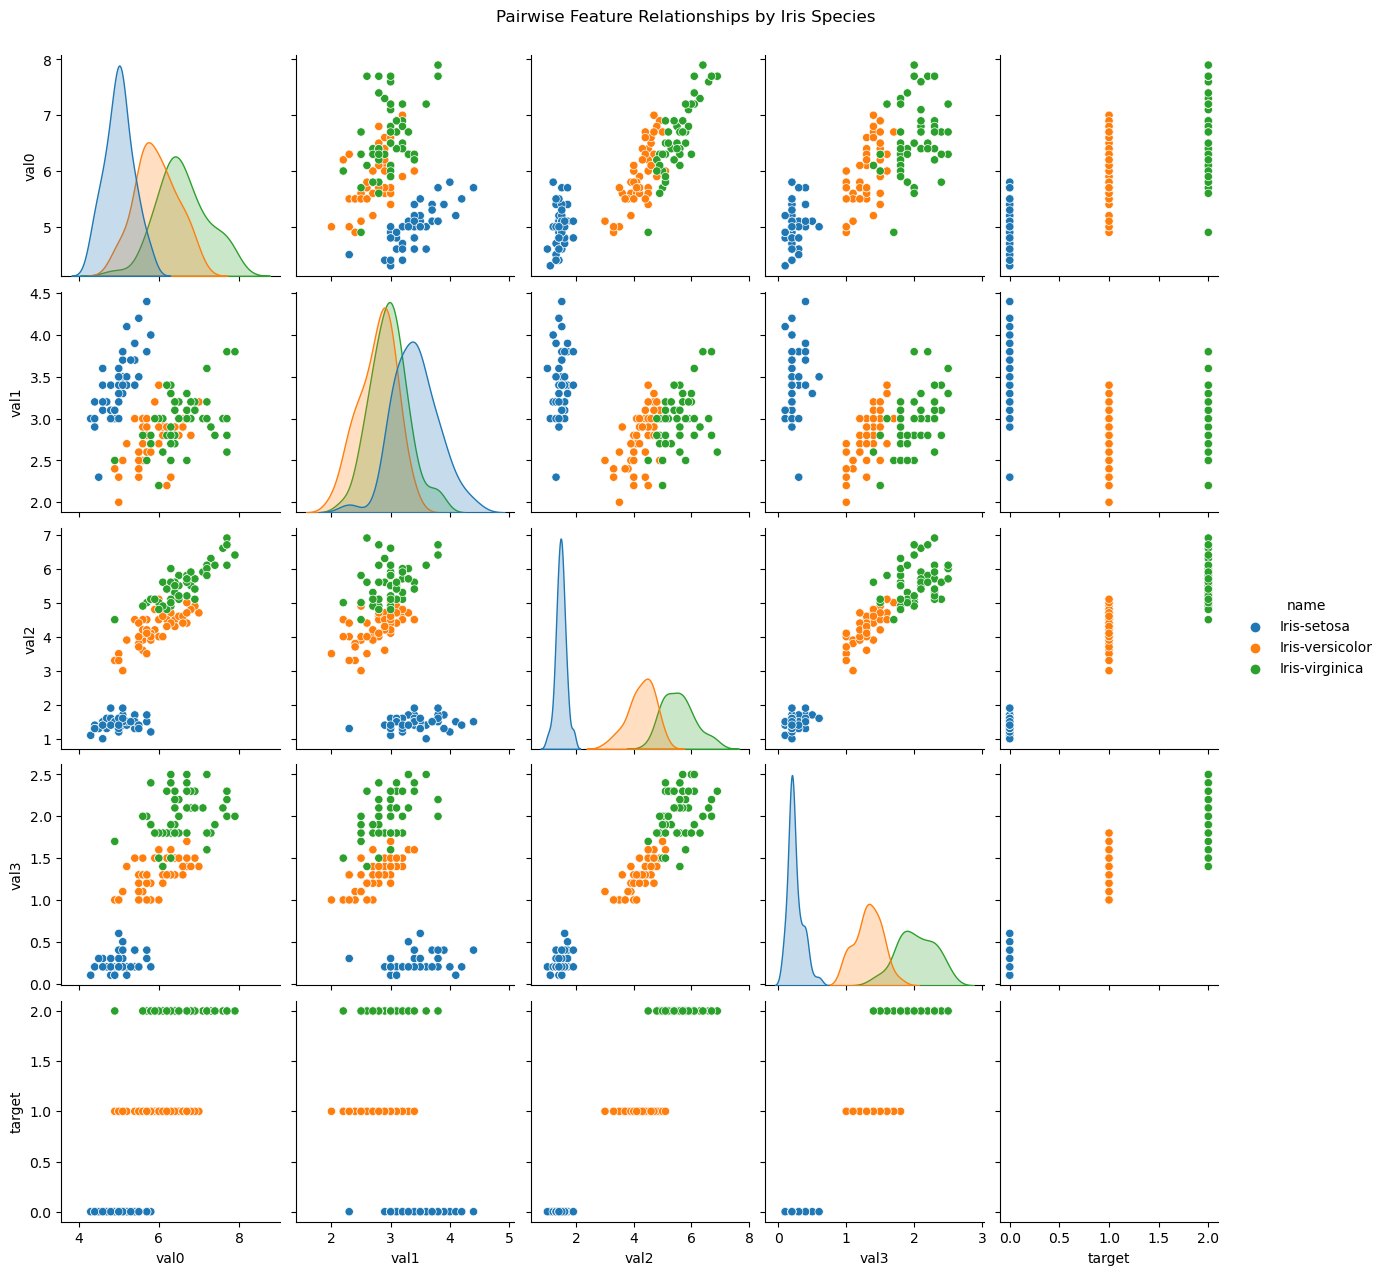

In [27]:
df = pd.read_csv('iris.csv')
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['name'])  # Encode class labels into numeric values
X = df.iloc[:, :-2].values  # Extract features
y = df['target'].values  # Extract target labels

scaler = StandardScaler()
X = scaler.fit_transform(X)

print("Dataset Information:")
print(df.info())  # Display information about the dataset
print("\nDataset Summary Statistics:")
print(df.describe())  # Display summary statistics
sns.pairplot(df, hue='name')
plt.suptitle("Pairwise Feature Relationships by Iris Species", y=1.02)
plt.show()

In [7]:
df.head()

val0  val1  val2  val3         name  target
0   5.1   3.5   1.4   0.2  Iris-setosa       0
1   4.9   3.0   1.4   0.2  Iris-setosa       0
2   4.7   3.2   1.3   0.2  Iris-setosa       0
3   4.6   3.1   1.5   0.2  Iris-setosa       0
4   5.0   3.6   1.4   0.2  Iris-setosa       0

In [82]:
def loading_data_for_ml(file_path_iris):
    file_path=("iris.csv")
    data=pd.read_csv('iris.csv')
    #now finding the X(input) that we will multiply with weights
    #X will be the feature
    X=data.iloc[:, :-1].values 
    #: will slice all the rows , -1 will make sure that we dont slice the last column
    #now finding the target value or the expected value for this
    Y=data.iloc[:,-1].values
    
    print("these are the input values which we labeled X")
    print(X)
    print("these are the OUTput values which we labeled Y")
    print(Y)#the actual label
    
    #now for preceptron we know that we need numerical input however
    #we have the label Y as a string thus we need to conver it
    
    
    encoder_Y=LabelEncoder()
    Y=encoder_Y.fit_transform(Y)
    print("these are the encoded values which we labeled Y")
    print(Y)
    return X,Y

loading_data_for_ml("iris.csv")
    

these are the input values which we labeled X
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [83]:
#we need different activation functions for the rule
#fucntion number 1
def sigmoid(x):
    s=1/(1+np.exp(-x))
    return s
#this fucntion will map between 0 and 1 for making predictions easier

In [84]:
#function number 2
def relu(x):
    return np.maximum(0,x)
#if the input is positive we will return the input otherwise we will 
#output 0


In [85]:
#function number 3
def sign(x):
    si=np.where(x>=0,1,-1)
    return si
#1 if the input is not negative and -1 otherwise

In [86]:
def softmax(x):
    exps = np.exp(x - np.max(x))
    softmax_output = exps / np.sum(exps)
    return softmax_output

In [118]:
class Preceptron_Rule:
    def __init__(self,activation='sign',learning_rate=0.01,iterations=10000):
        print("in the preceptron intilizer")
        
        self.activation=activation
        self.learning_rate=learning_rate
        self.iterations=iterations
        
    def activate(self,x):
        if self.activation=='sign':
            return sign(x)
        elif self.activation=='relu':
            return relu(x)
        elif self.activation=='sigmoid':
            return sigmoid(x)
        elif self.activation=='softmax':
            return softmax(x)
        else:
            print("wrong avtivation function")
            
            
    def fit_for_training(self,x,y):
        number_of_samples=len(x)
        print("the number of samples is",number_of_samples)
        number_of_features=0
        if len(x)>0:
            number_of_features=len(x[0])
        print("the number of featurs per sample",number_of_features)
        self.weights=[0]*number_of_features
        print("the weights are",self.weights)
        self.bias=0
        print("the initial bias is",self.bias)
        
        #now will be lopping though the records for iterations over the whole data set
        
        for iteration in range(self.iterations):
            for i in range(number_of_samples):
                sample= x[i]
#                 print("the current sample is",sample)
                
                products=[]
                for k in range(number_of_features):
                    product=sample[k]*self.weights[k]
                    products.append(product)
                linear_output=0
                for product in products:
                    linear_output+=product
                linear_output+=self.bias
                y_pred=self.activate(linear_output)
                update=self.learning_rate*(y[i]-y_pred)
                for l in range(number_of_features):
                    self.weights[l]+=update*sample[l]
                self.bias+=update
            if iteration%1000==0:
                print(f"iteration{iteration}: preceptron training")
    def predict(self, X):
        # Predict by calculating the linear output and passing it through the activation function
        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = self.activate(linear_output)
        return np.where(y_pred >= 0, 1, 0 )               




In [119]:
# 2. Load and prepare the dataset
print("\n Loading and preparing the dataset")
X, y = loading_data_for_ml('iris.data')  # Load dataset using the provided path
#This means adjusting the values so that the mean of each feature becomes 0 and the standard deviation becomes 1.
#Perceptrons will perform better when input data features are on a relatively similar scale and close to a normal distribution.
#Without standardizing the data:
#Learning may be slower or may converge to suboptimal 
#The model might be biased towards features with a larger range of values, thus ignoring the contribution of smaller scale features.



 Loading and preparing the dataset
these are the input values which we labeled X
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 

In [128]:
scaler = StandardScaler()  # Initialize a standard scaler for normalization
#fit_transform() fitting (finding the mean and standard deviation for each feature across the dataset) and transforming (applying the normalization).
X = scaler.fit_transform(X) 
print("Dataset standardized.")

Dataset standardized.


In [157]:

# 4. Divide the dataset into training and testing sets using an 80/20 ratio
#80 is the traning set
#20 is the testing set

print("\nTASK 4: Splitting the dataset into training and testing sets (80/20)")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))



TASK 4: Splitting the dataset into training and testing sets (80/20)
Training set size: 120
Testing set size: 30


In [162]:
# 1. Implement the Perceptron Learning Rule from scratch
print("\nImplementing the Perceptron Learning Rule")
perceptron = Preceptron_Rule(activation='sign', learning_rate=0.001, iterations=10000)  # Initialize Perceptron
perceptron.fit_for_training(X_train, y_train)  # Train the Perceptron on the training data
y_pred_perceptron = perceptron.predict(X_test)  # Predict labels on the testing data



Implementing the Perceptron Learning Rule
in the preceptron intilizer
the number of samples is 120
the number of featurs per sample 4
the weights are [0, 0, 0, 0]
the initial bias is 0
iteration0: preceptron training
iteration1000: preceptron training
iteration2000: preceptron training
iteration3000: preceptron training
iteration4000: preceptron training
iteration5000: preceptron training
iteration6000: preceptron training
iteration7000: preceptron training
iteration8000: preceptron training
iteration9000: preceptron training


In [163]:
print("\nEvaluating model accuracy")
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
print(f"Perceptron Learning Rule Accuracy: {accuracy_perceptron * 100}%")    


Evaluating model accuracy
Perceptron Learning Rule Accuracy: 66.66666666666666%
